<hr style="margin-bottom: 40px;">

<img src="crime.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>
    
    
# San Francisco Crime Classification - KNN Project

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz. Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay. From Sunset to SOMA, and Marina to Excelsior, this dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods.

This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7… belong to test set, week 2,4,6,8 belong to training set. There are 9 variables:

- Dates - timestamp of the crime incident.
- Category - category of the crime incident (only in train.csv).
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident
- X - Longitude
- Y - Latitude

The goal here is to predict the category of crime that occurred, given the time and location.

This notebook has the following structure 

1. Read and explore the train data
2. Understanding the Data
3. Target Variable
4. Read the test data
5. Understanding the features and the problems
2. Clean the Data
3. Visualize the Data
4. Model the Data using KNN

## Imports and data read.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


# Understanding the data

It's important to understand all the columns before we move further. Train data has the following columns:

1. Dates - timestamp of the crime incident
2. **Category** - category of the crime incident (only in train.csv). This is the target variable we are going to predict.
3. Descript - detailed description of the crime incident (only in train.csv)
4. DayOfWeek - the day of the week
5. PdDistrict - name of the Police Department District
6. Resolution - how the crime incident was resolved (only in train.csv)
7. Address - the approximate street address of the crime incident 
8. X - Longitude
9. Y - Latitude

In [5]:
#target variable

target = train_data["Category"].unique()
print(target)

# There are multiple categorical values. It looks like a multi class classification problem.

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [6]:
#Let's read the test data now

test_data = pd.read_csv("test.csv")

In [7]:
test_data.head()
#Test data does not have the target variable and the resolution

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


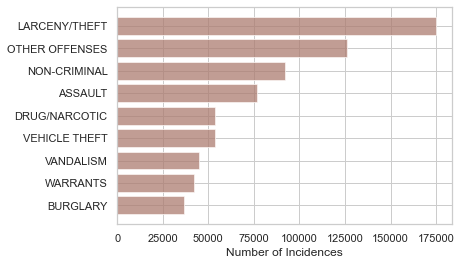

In [8]:
# Get 10 most common crimes
most_common_cat = train_data['Category'].value_counts()[0:9].sort_values()
most_common_cat.values

categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Incidences')
plt.show()

In [14]:
# Extract the most common crimes from the data
most_commons = train_data[train_data['Category'].apply(lambda x: x in categs)]


# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Category'], most_commons['DayOfWeek']) 

# Calculate percentages of crimes
cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
cat_per_week_common
# # Rearrange columns
# cat_per_week_common = cat_per_week_common[['Monday', 
#                                            'Tuesday', 'Wednesday', 
#                                            'Thursday', 'Friday', 
#                                            'Saturday','Sunday']]
# # Transform into a heat map
# fig = plt.figure(figsize=(10,10))
# ax = sns.heatmap(cat_per_week_common,
#                  cmap="BuPu", linewidths=.5)
# plt.xticks(fontsize=12,rotation=45,ha='right')
# plt.yticks(fontsize=12)
# plt.xlabel("")
# plt.ylabel("")

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ASSAULT,0.145169,0.137364,0.156030,0.157162,0.133280,0.133722,0.137273
BURGLARY,0.172140,0.143164,0.129343,0.115114,0.145558,0.146211,0.148470
DRUG/NARCOTIC,0.137481,0.144948,0.118397,0.113820,0.156640,0.157010,0.171703
LARCENY/THEFT,0.154969,0.134763,0.155615,0.138079,0.139594,0.136975,0.140006
NON-CRIMINAL,0.151499,0.139268,0.151749,0.140546,0.138878,0.138001,0.140059
OTHER OFFENSES,0.147311,0.140963,0.135748,0.122498,0.146312,0.149062,0.158105
VANDALISM,0.158569,0.132946,0.163801,0.147613,0.133706,0.130844,0.132521
VEHICLE THEFT,0.160149,0.137818,0.150964,0.139529,0.138636,0.135048,0.137855
WARRANTS,0.140380,0.137656,0.127067,0.125101,0.151040,0.152248,0.166509


In [ ]:
# Pick crime types of interest
violent = train[train.Category.isin(['ASSAULT', 'BURGLARY',
                                       'KIDNAPPING', 'ROBBERY',  
                                       'SEX OFFENSES FORCIBLE'])].copy()
# Create Arrest variable
violent['Arrest'] = np.where(violent['Resolution'].isin(['NONE', 'NOT PROSECUTED']), 0,1)

# Calculate counts
arrest_counts = violent['Category'][violent.Arrest==1].value_counts()[0:9]
total_counts = violent['Category'].value_counts()[0:9]
arrest_counts = arrest_counts/(total_counts).sort_index()
total_counts = total_counts/(total_counts).sort_index()

# Plot values
total_counts.plot.barh(color='crimson', label= 'Unsolved')
arrest_counts.plot.barh(color='mediumseagreen', label='Solved')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Proportion')
plt.show()

In [ ]:
#Converting the Category column in the train dataset.
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
train_data["Category"] = train_data["Category"].replace(data_dict)

#Replacing the day of weeks in both datasets.
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
train_data["DayOfWeek"] = train_data["DayOfWeek"].replace(data_week_dict)
test_data["DayOfWeek"] = test_data["DayOfWeek"].replace(data_week_dict)

##Converting the PdDistrict column in both datasets.
district = train_data["PdDistrict"].unique()
data_dict_district = {}
count = 1
for data in district:
    data_dict_district[data] = count
    count+=1 
train_data["PdDistrict"] = train_data["PdDistrict"].replace(data_dict_district)
test_data["PdDistrict"] = test_data["PdDistrict"].replace(data_dict_district)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

## Exploratory Data Analysis

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))

# sns.barplot(x=2, y='Resolution', data=a, label="Total", color="b")
sns.countplot(y="Resolution", data=train_data, order=train_data['Resolution'].value_counts().index, palette='GnBu_d')

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Resolution",xlabel="Cases")
sns.despine(left=True, bottom=True)

## Modeling the Data - KNN Algorithm

In [ ]:
#Let's use knn algorithm on numeric columns

features = ["DayOfWeek", "PdDistrict",  "X", "Y"]
X_train = train_data[features]
y_train = train_data["Category"]
X_test = test_data[features]

In [ ]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)                

In [ ]:
data_dict

In [ ]:
#print(type(predictions))
result_dataframe = pd.DataFrame({
    "Id": test_data["Id"]
})
for key,value in data_dict_new.items():
    result_dataframe[key] = 0
count = 0
for item in predictions:
    for key,value in data_dict.items():
        if(value == item):
            result_dataframe[key][count] = 1
    count+=1
result_dataframe.to_csv("submission_knn.csv", index=False) 